Your Name and PRN:
- Name: Rajesh Singh
- PRN : 240840128028
- Date : 19/11/2024

### Instructions:
- File name to be `<last four dights of PRN>_<First Name>_<assignment number>.ipynb`. e.g.
    - last four dights of PRN: 2004
    - First Name : Pramod
    - assignment number: A01
- Code should not break while running
- Add sufficient comments to explain each step
- Do not Zip and upload notebooks
- Following format of files are not allowed, unless instructed otherwise:
    - zip
    - pdf
    - img

# Deep Neural Networks
## Assignment A01

## Implement of MP Neuron
### DataSet - As instructed.

$$
\Large \text{MP Neuron Model with Sigmoid Activation Function}
$$

In [129]:
###-----------------
### Import Libraries
###-----------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



In [130]:
###----------------
#Global Variables
###----------------

from calendar import EPOCH


TEST_SIZE = 0.2
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)


N_SAMPLES = 1000
NOISE = 0.2
ALPHA = 0.1
EPOCHS = 2000

# set location of input files and output files
inpDir = '../input'
outDir = '../output'


# Set plotting parameters
params = {
    'figure.figsize': (15,4),
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
}
plt.rcParams.update(params)


CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [131]:
X, y = datasets.make_moons(
    n_samples=N_SAMPLES,
    noise=NOISE, 
    random_state=RANDOM_STATE, 
    shuffle=True
)

X.shape, y.shape


((1000, 2), (1000,))

In [132]:
df = pd.DataFrame(X, columns=["X_1", "X_2"])
df["Target"] = y
df.head()

,X_1,X_2,Target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Figure size 1500x400 with 0 Axes>

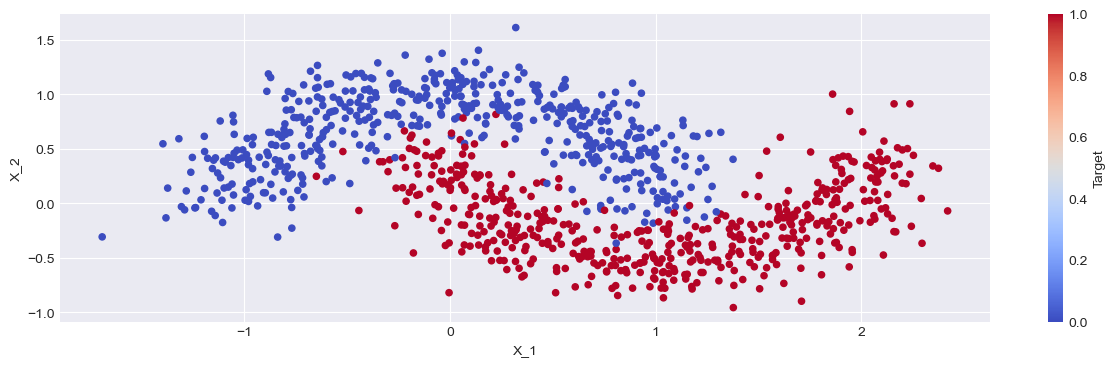

In [133]:
plt.figure()
df.plot.scatter(x="X_1", y="X_2", c="Target", cmap=CMAP)
plt.show() 

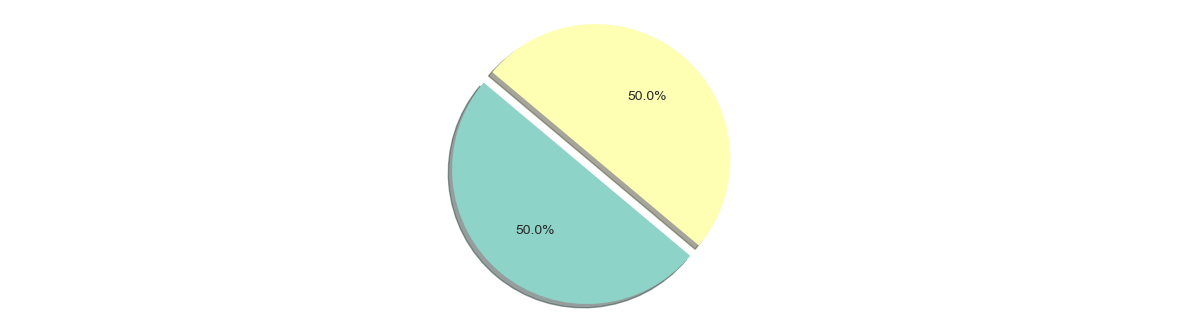

In [134]:
fix, axis = plt.subplots()
explode = (0, 0.1,) # only "explode" the 2nd ring
axis.pie(
    df['Target'].value_counts(), 
    explode=explode, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140
)
axis.axis('equal') 
plt.show()

In [135]:
data_train, data_test = df.to_numpy()[:900], df.to_numpy()[900:]

display(data_train.shape, data_test.shape)
display(type(data_train), type(data_test))

(900, 3)

(100, 3)

numpy.ndarray

numpy.ndarray

In [136]:
def sigmoid(z):
    """Returns the sigmoid of z.

    Args:
        z (float): The value to be transformed. 

    Returns:
        float: The transformed value.
    """
    return 1 / (1 + np.exp(-z))



def predict_sigmoid(row, wgts):
    """
    Make a prediction based on the given row and weights.
        
    z = wgts[0] + row[i] * wgts[i+1] + ... + row[n] * wgts[n+1]
            ^               ^                  ^ 
            bias        first weight        nth weight

    if z >= 0 then predict 1
    else predict 0

    Args:
        row (array): all the values in the row
        wgts (_type_): all the weights for perticular epoch 

    Returns:
        z (int): the prediction
    """

    z = wgts[0] # bias

    for  i in range(len(row) - 1):
        z = z + row[i] * wgts[i + 1]

    return sigmoid(z)


In [ ]:
rng = np.random.default_rng(seed=RANDOM_STATE)

def train_weights_sigmoid(train, aplha, n_epochs):
    """
    The training function for the neural network without using any activation function
    Error function: ylog(a)

    ∂Loss(a,y)/∂z   = a - y       => ∂z = dz 
    ∂Loss(a,y)/∂w   = Xₙ(a - y)   => ∂w = dw

    Args:
        train (array): all the feature variables
        aplha (float): the learning rate    
        n_epochs (int): the number of epochs / iterations
    
    Returns:
        weights (array): the weights of the neural network
    """

    errors = []
    weights = rng.random(train.shape[1])                            # Random initial weights of size n_features
    m = train.shape[0]                                              # Number of samples of  size total datapoints

    for epoch in range(n_epochs):
        sum_error = 0.0
        for row in train:
            prediction = predict_sigmoid(row, weights)

            dz = prediction - row[-1]                               # a - y
            
            sum_error += - row[-1]*np.log(prediction)               # ylog(a)
            
            weights[0] += -aplha * dz/m                             # w₀ = w₀ + α(y − ŷ)
            for i in range(len(row)-1):
                weights[i+1] += -aplha * dz * row[i]/m              # wᵢ = wᵢ + α(y − ŷ)*xᵢ
        
        errors.append(sum_error/m)  
        
    return errors, weights

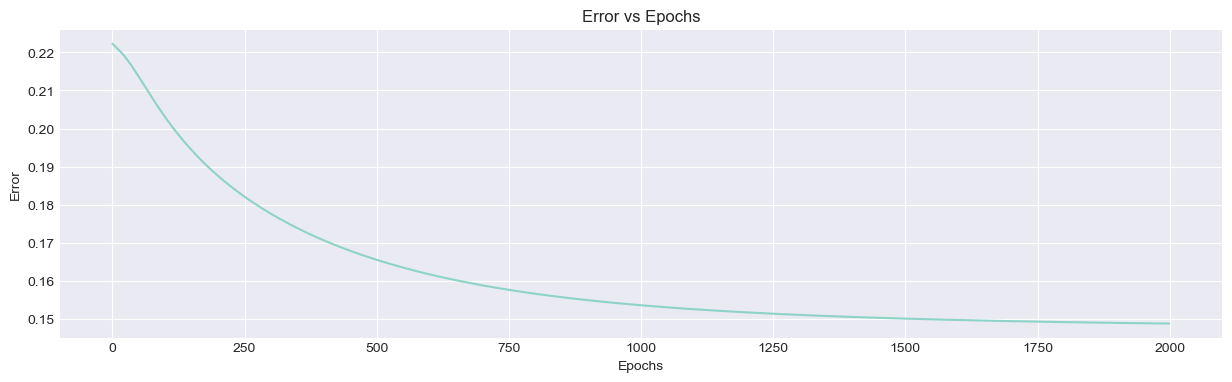

In [138]:
errors, weights = train_weights_sigmoid(data_train,ALPHA,EPOCHS)

fig, ax = plt.subplots()
ax.plot(errors)
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.set_title('Error vs Epochs')
plt.show()
 

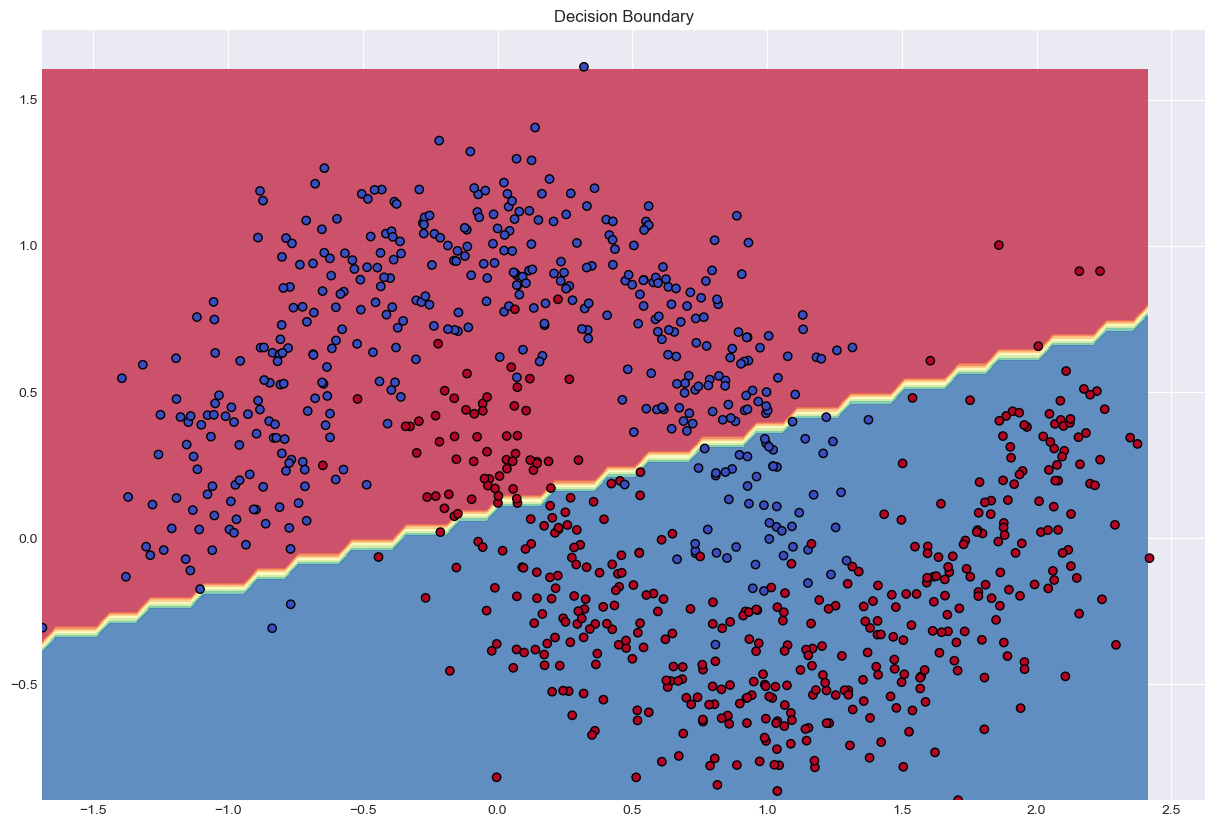

In [ ]:
def plot_decision_boundary(wts, X):
    """This function plots the decision boundary for the neural network

    Args:
        wts (array): the weights of the neural network  
        X (array): the feature variables
    
    Returns:
        None
    """
    dm = 0.05

    # Minimum and maximum values along each axis
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    # Generate a grid of points with distance 'dm' using min and max values alogn each axis
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, dm), 
        np.arange(y_min, y_max, dm)
    )


    XX = np.c_[
        xx.ravel(),
        yy.ravel()
    ]

    XX = np.hstack((
        XX,
        np.ones((XX.shape[0], 1))
    ))

    y_pred = []

    for row in XX:
        y_p = predict_sigmoid(row, wts)
        y_p = 1 if y_p > 0.5 else 0
        y_pred.append(y_p)

    Z = np.array(y_pred).reshape(xx.shape)


    fig, ax = plt.subplots(figsize=(15, 10))
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha = 0.8)
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=CMAP, edgecolors='k')
    ax.set_title('Decision Boundary')
    plt.show()

plot_decision_boundary(weights, data_train)

In [140]:
def confusion_mattrix_accuracy_opt(wts, X):
    """Returns confusion matrix and accuracy of the model

    Args:
        wts (array): weights of the model       
        X (array): input data

    Returns:
        confusion matrix and accuracy of the model
    """
    y_pred = []

    for row in X:
        y_p = predict_sigmoid(row, wts)
        y_p = 1 if y_p > 0.5 else 0
        y_pred.append(y_p)

    y_pred = np.array(y_pred)
    cm = confusion_matrix(y_pred, X[:, -1])
    acc = accuracy_score(y_pred, X[:, -1]) 
    return cm, acc


'Accuracy score is 0.8655555555555555'

,0,1
0,385,64
1,57,394


<Figure size 1000x1000 with 0 Axes>

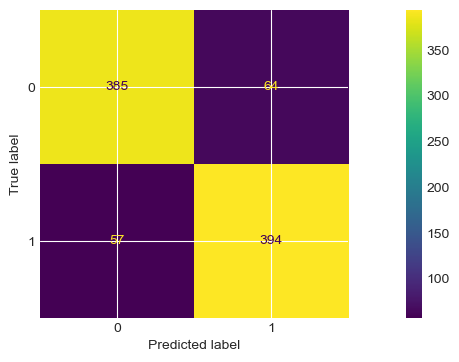

In [141]:
cm, acc =  confusion_mattrix_accuracy_opt(weights, data_train)

display(f'Accuracy score is {acc}')
display(pd.DataFrame(cm))    


plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
)
disp.plot()
plt.show()

'Accuracy score is 0.9'

,0,1
0,55,7
1,3,35


<Figure size 1000x1000 with 0 Axes>

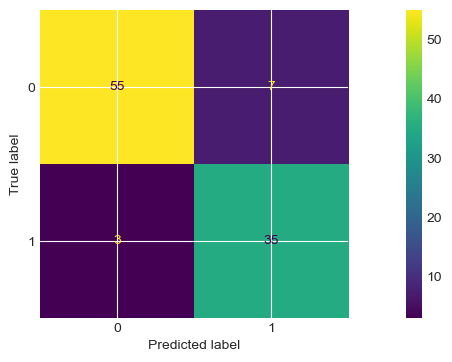

In [142]:
cm, acc =  confusion_mattrix_accuracy_opt(weights, data_test)

display(f'Accuracy score is {acc}')
display(pd.DataFrame(cm))    


plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
)
disp.plot()
plt.show()